# 3장. 분류
>  1. MNIST
>  2. 이진 분류기 훈련
>  3. 성능 측정
>  4. 다중 분류
>  5. 오류 분석
>  6. 다중 레이블 분류
>  7. 다중 출력 분류


## 1. MNIST

### MNIST 데이터셋
* 미국의 고등학생과 인구조사국 직원들이 손으로 쓴 70,000개의 숫자 이미지로 구성된 데이터셋
* 학습용으로 많이 사용되는 이미지 데이터셋

#### `sklearn.datasets`
*  fetch_* 함수 : 실전 데이터셋을 다운로드. `sklearn.utils.Bunch` 객체 반환하는 듯
*  load_* 함수 : 사이킷런에 번들로 포함된 소규모 데이터셋 로드
*  make_* 함수 : 가짜 데이터셋을 생성. 입력과 타깃 데이터를 담은 (X,y) 튜플 반환

#### `sklearn.utils.Bunch` : 여러 속성을 가지는 딕셔너리
*  DESCR : 데이터셋 설명
*  data : 입력 데이터, 일반적으로 2D 넘파이 배열
*  target : 레이블, 일반적으로 1D 넘파이 배열

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame = False)
# as_frame을 False : 입력을 dataframe이 아니라 numpy array로 받는다. 데이터로서의 분석보다는 머신러닝 모델에서 numpy array를 input으로 받음.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
type(mnist)

sklearn.utils._bunch.Bunch

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
mnist.url

'https://www.openml.org/d/554'

In [ ]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

*참고 : as_frame=True일 때*

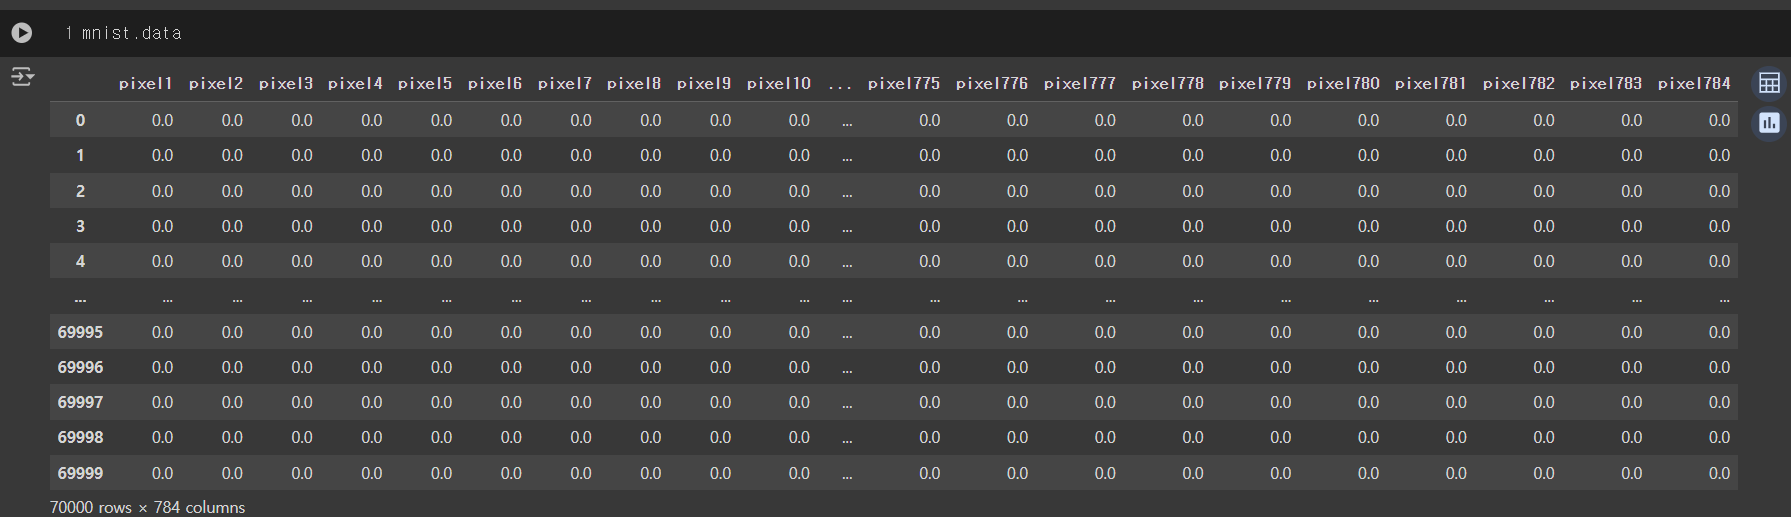

In [ ]:
type(mnist.data)

numpy.ndarray

In [ ]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
type(mnist.target)

numpy.ndarray

In [ ]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

>

> 이미지 70000개, 각 이미지는 784개의 특성 (이미지가 28*28 픽셀)

In [ ]:
X.shape

(70000, 784)

In [ ]:
28 * 28

784

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
y.shape

(70000,)

> 각각의 특성은 0(흰색)부터 255(검은색) 까지의 픽셀 강도를 나타냄

In [ ]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
X[0].shape

(784,)

> 샘플의 특성 벡터를 추출 -> 28*28 배열로 변환 -> matplotlib으로 그리기

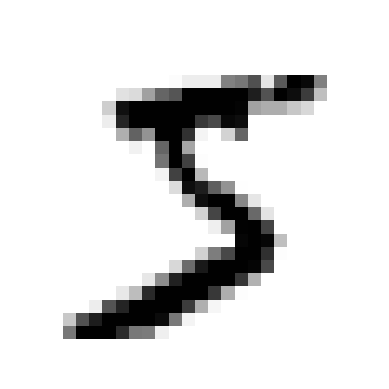

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  #print (image.shape)
  plt.imshow(image, cmap = "binary") # cmap -> color map, binary는 흑백컬러맵
  plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [ ]:
y[0] # 0번 라벨. 타입은 문자열

'5'

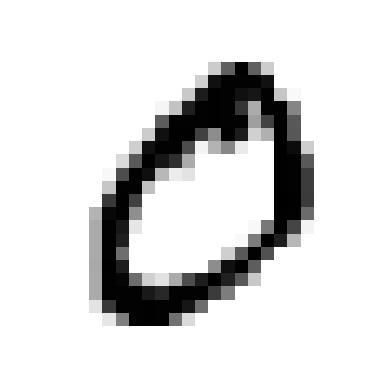

In [ ]:
plot_digit(X[1])

In [ ]:
y[1]

'0'

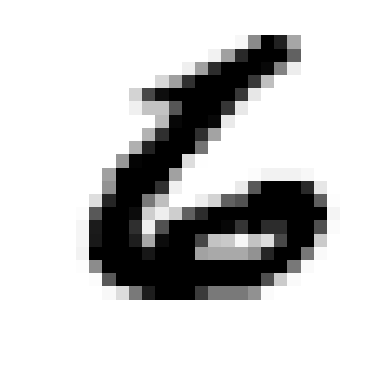

In [ ]:
plot_digit(X[-1])

In [ ]:
y[-1]

'6'

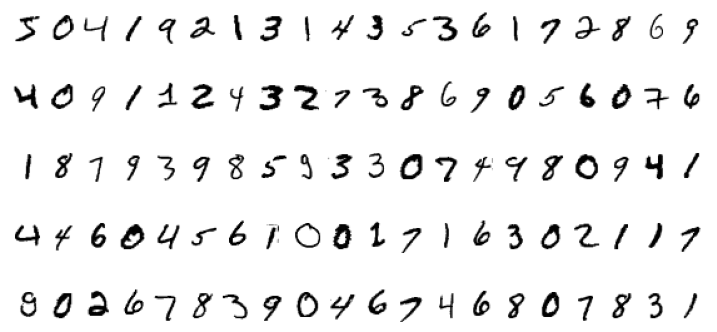

In [ ]:
# 추가 코드 – 그림 3–2를 생성하고 저장합니다
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 20, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
#save_fig("more_digits_plot", tight_layout=False)
plt.show()

> * MNIST 데이터 셋은 이미 훈련세트와 테스트 세트로 분리되어 있음
> * 60,000개 훈련세트, 10,000개 테스트 세트
> * 훈련 세트가 이미 무작위로 잘 섞여 있어서 교차 검증에 문제 없음.(참고. 시계열 데이터는 섞지 않는 것이 좋음.)


In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
y_test.shape

(10000,)

## 2. 이진 분류기 훈련

### 이진 분류기
* 2개의 클래스를 구분 : '5'와 '5 아님'으로 변환
* True : 5 / False : 5 이외의 숫자

In [ ]:
y_train_5 = (y_train == '5') # 5는 True고, 다른 숫자는 모두 False
y_test_5 = (y_test == '5')

In [ ]:
y_train_5

array([ True, False, False, ...,  True, False, False])

### 모델 훈련

SGD (확률적 경사 하강법, Stochastic Gradient Descent) 분류기 `SGDClassifier`

* 큰 데이터셋 처리에 효율적: 한번에 하나씩 훈련 샘플을 독립적으로 처리 -> 온라인 학습에 적합
** 전체 데이터셋 대신 매 반복마다 하나의 샘플만을 사용하여 기울기를 계산하고 매개변수를 업데이트

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) #테스트의 재현성을 위해.. random_state 설정..42는 관습적인 숫자
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

> 784개 특성(픽셀 정보)를 이용해서 해당 샘플이 5인지 아닌지 구분하도록 훈련

In [ ]:
sgd_clf.predict([some_digit]) # some_digit = X[0]

array([ True])

In [ ]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

## 3. 성능 측정

### 정확도로 측정

> * `cross_val_score()`: 교차검증을 통해 모델의 성능을 평가하는 데 사용
> * k-fold 교차 검증: 훈련세트를 k개의 폴드로 나누고 평가를 위한 폴드 1개를 빼고 나머지로 훈련 - 과적합방지, 일반화된 성능 파악

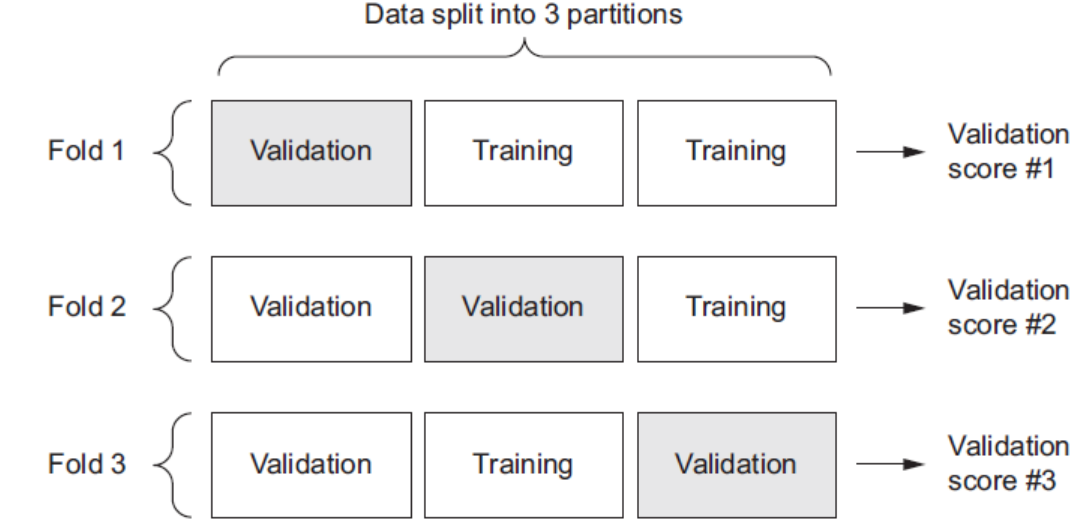

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy") # fold 3개, 평가지표 : accuracy

array([0.95035, 0.96035, 0.9604 ])

> * 위에서 정확도가 95% 이상으로 나옴
> * 평가지표가 적절한지 확인해보자

`DummyClassifier` : 분류기의 기준선을 정할 때나 모델의 오류 분석 시에 이용

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
dummy_clf.predict(X_train)

array([False, False, False, ..., False, False, False])

In [ ]:
print(any(dummy_clf.predict(X_train)))

False


In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring = "accuracy")

array([0.90965, 0.90965, 0.90965])

> * 이미지의 10% 정도만 숫자가 5이기 때문에 무조건 '5 아님'으로 예측하면 accuracy가 90%나 나온다.
* **불균형한 데이터셋**을 다를 때는 더더욱 분류기의 성능 측정 지표로 arruacy는 선호하지 않게 됨. --> **confusion matrix**

> * 잠시 `DummyClassifier` 살펴보자

In [ ]:
#모든 클래스에 대해 동일한 확률로 무작위 예측
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train_5)
dummy_clf.predict(X_train)
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring = "accuracy")

array([0.4947 , 0.49825, 0.4981 ])

In [ ]:
#입력 데이터의 클래스 분포를 기반으로 무작위로 예측
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train_5)
dummy_clf.predict(X_train)
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring = "accuracy")

array([0.8354 , 0.83445, 0.837  ])

In [ ]:
#가장 많이 나타나는 클래스로 모든 예측
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train_5)
dummy_clf.predict(X_train)
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring = "accuracy")

array([0.90965, 0.90965, 0.90965])

> * 교차 검증 구현
> * `StratifiedKFold` : 각 클래스의 비율이 유지도도록 폴드를 생성

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True) # suffle 데이터셋 섞기

for train_index, test_index in skfolds.split(X_train, y_train_5): # 데이터를 3개의 폴드로 나누고, 각 폴드에 대해 훈련용 인덱스(train_index)와 테스트용 인덱스(test_index)를 생성
  clone_clf = clone(sgd_clf) # 이전 학습의 영향을 받지 않기 위해 매번 모델을 복제
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.95355
0.9681
0.9669


### Confusion Matrix (오차행렬)

> * 클래스별 예측 결과를 정리한 행렬
> * 모든 A/B 쌍에 대해 클래스 A의 샘플이 클래스 B로 분류된 횟수
> * 여기서도 훈련 세트로만!!
> * `cross_val_predict` : k-폴드 교차 검증 수행 후 각 테스트 폴드에서 얻은 예측을 반환 / 아까 `cross_val_score`는 성능지표에 해당하는 score를 반환

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [ ]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [ ]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

* 행 : 실제 클래스
* 열 : 예측 클래스
* 1행 : 53892 : 5가 아님으로 예측하고 맞춤 / 687 : 5라고 예측하고 틀림 (1종 오류)
* 2행 : 1891 : 5가 아님으로 예측하고 틀림(2종오류) / 3530 : 5라고 예측하고 맞음

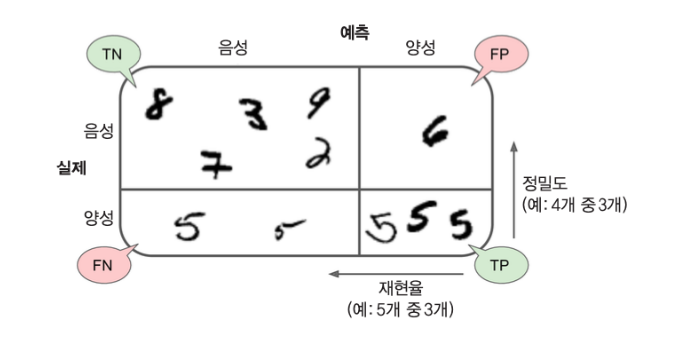

완벽한 분류기
같은 y 어레이를 비교

In [ ]:
y_train_perfect_predictions = y_train_5 # 완벽한 분류기
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

> * 정확도 (Accuracy) : 라벨을 정확하게 맞힌 비율. 정확도가 96% 이지만, 무조건 5가 아니다라고 예측하는 모델도 90%의 정확도를 보임(불균형 데이터일 경우 사용이 어려움)

> * 정밀도 (Precision) : 양성 예측의 정확도. TP / (TP + FP)
> ** Precision = TP / (TP + FP)
> ** 3530 / (3530 + 687) = 0.837

> * 재현율 (Recall) : 분류기가 정확하게 감지한 양성 샘플의 비율. 민감도(sensitivity), 진짜양성비율(true positive rate)
> ** Recall = TP / (TP + FN)
> ** 3530 / (3530 + 1891) = 0.651


정밀도

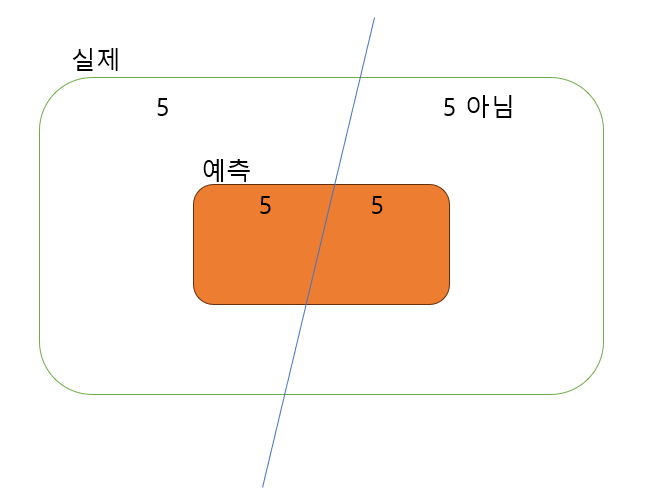

재현율

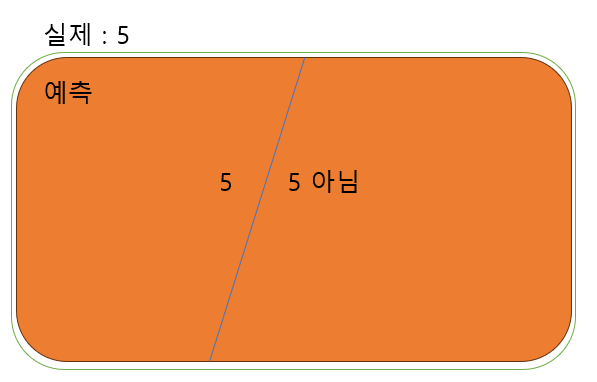


### 정밀도와 재현율

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) #y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

0.8370879772350012

> 5로 예측한 것중 83.7%가 정확

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

> 전체 실제 5 중에 65.1%만 감지함

F1 Score
* 정밀도와 재현율을 하나의 숫자로 표현 (조화평균)
* 조화 평균은 낮은 값에 비중을 두기 때문에 F1 점수가 높으려면 재현율, 정밀도가 모두 높아야 함.

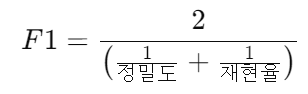

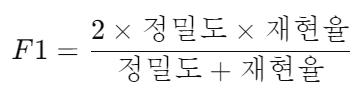

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

정밀도와 재현율의 중요도
* 정밀도가 중요한 경우 : 나쁜 동영상 분류처럼 일부 양성을 놓치더라도 음성이 양성으로 분류되는 경우가 적어야 하는 경우
** 좋은 동영상이 제외되더라도, 안전한 동영상만 노출 // 나쁜 영상을 좋은 영상으로 예측해서 보여주면 안되니까 -> 1종오류 관련
* 재현율이 중요한 경우 : 도둑 분류나 암 진단처럼 예측이 틀리면 큰 책임이 따르는 경우
** 실제 도둑을 도둑이 아니라고 예측해서 풀어주면 안되니까 // 차라리 평범시민을 도둑으로 잘못 분류하는게 낫다 -> 2종 오류 관련


### 정밀도/재현율 트레이드오프

* `SGDClassifier`는 결정함수를 이용하여 각 샘플의 점수를 계산
* 점수가 임계값보다 크면 양성 클래스에 할당 / 아니면 음성 클래스에 할당
** 여기서 점수는 정확히 뭘 의미하지? 양성 클래스에 속할 가능성 점수?


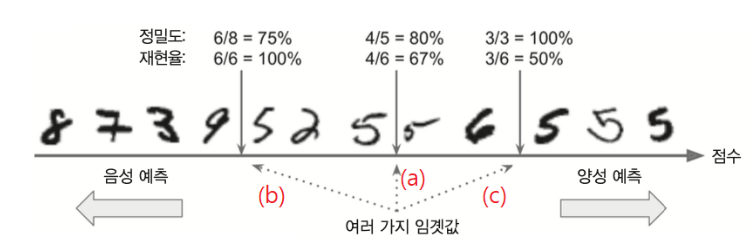

> * 점수를 낮은 것부터 높은 점수까지 나열한 그림
> * 정밀도와 재현율은 상호 반비례 관계로 트레이드오프 관계라고 볼수 있음.
> * (a)
> ** 정밀도 80% : 양성 예측 5건 중 실제 5는 4개(TP), 5 아닌 샘플 1개 (FP)
> ** 재현율 67% : 실제 6개의 5중 4개 맞춤 (TP), 2개의 실제5를 5가 아님으로 예측 (FN)
> * (b)
> ** 정밀도 75% : 양성 예측 8건 중 실제 5는 6개(TP), 5 아닌 샘플 2개 (FP)
> ** 재현율 100% : 실제 6개의 5중 6개 맞춤 (TP), 0개의 실제5를 5가 아님으로 예측 (FN)
> * (c)
> ** 정밀도 100% : 양성 예측 3건 중 실제 5는 3개(TP), 5 아닌 샘플 0개 (FP)
> ** 재현율 50% : 실제 6개의 5중 3개 맞춤 (TP), 3개의 실제5를 5가 아님으로 예측 (FN)

> **--> 임계값이 높을수록 재현율은 낮아지고, 반대로(보통) 정밀도는 높아짐**

임계값을 직접 정할 수는 없지만 예측에 사용된 점수는 확인 가능

In [ ]:
y_scores = sgd_clf.decision_function([some_digit]) # some_digit = X[0]
y_scores

array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [ ]:
sgd_clf.decision_function([X[1]])

array([-5897.37359354])

* predict() 함수도 decision_function() 함수를 이용해 0보다 큰 경우를 양성으로 예측

In [ ]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

> * 임계값을 높이면 실제5인 값을 놓치게됨 -> 재현율이 줄어듬

적절한 임계값 정하기?
* 예측 결과 별 결정 점수 반환으로 지정

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [ ]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [ ]:
y_train_5[:5]

array([ True, False, False, False, False])

In [ ]:
y_scores[:5]

array([  1200.93051237, -26883.79202424, -33072.03475406, -15919.5480689 ,
       -20003.53970191])

> * 라벨이 True인 첫번째 샘플만 양수
> * predict 함수는 임계값 0을 기준으로 양성을 예측

임계값을 기준으로 정밀도와 재현율 확인

`precision_recall_curve` : 예측 점수에 기반하여 정밀도, 재현율, 그리고 이 점수들을 분할하는 임계값을 반환

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
threshold

3000

In [ ]:
thresholds >= threshold

array([False, False, False, ...,  True,  True,  True])

In [ ]:
thresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

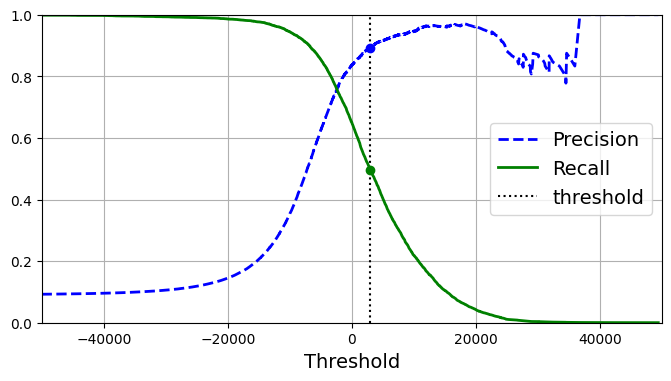

In [ ]:
plt.figure(figsize=(8, 4))  # 추가 코드
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold") # threshoold = 3000

# 추가 코드 – 그림 3–5를 그리고 저장합니다
idx = (thresholds >= threshold).argmax()  # 첫 번째 index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
#save_fig("precision_recall_vs_threshold_plot")

plt.show()

* Precision 오른쪽에 울퉁불퉁한 부분은 임계값이 올라가도 정밀도가 낮아지는 경우가 있기 때문

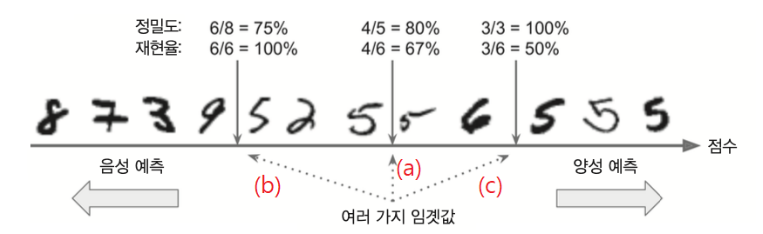

> 그림에서 (a)를 오른쪽으로 한칸 옮기면 양성 예측 4개중 3개 맞춤 -> 3/4(75%)

> 내가 원하는 임계값을 갖는 분류기가 필요하면 어쩌지??

좋은 정밀도/재현도 트레이드오프 선택은 두 값에 대한 곡선을 그리는 것이다

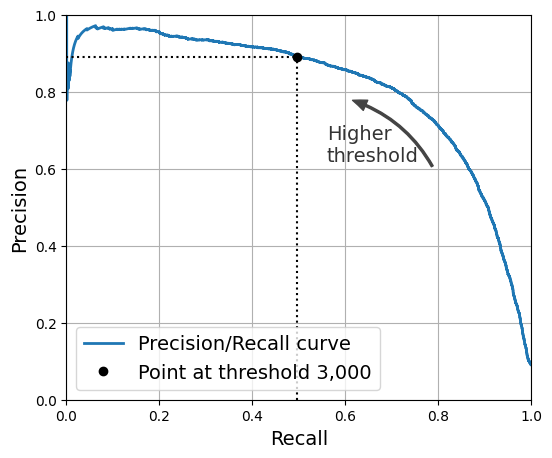

In [ ]:
import matplotlib.patches as patches  # 추가 코드 – 구부러진 화살표를 그리기 위해서

plt.figure(figsize=(6, 5))  # 추가 코드

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
#save_fig("precision_vs_recall_plot")

plt.show()

* 그래프에서 재현율(Recall) 80% 부근에서 정밀도(Precision)이 급격이 줄어듬.
* 보통 이 직전을 정밀도/재현율 트레이드오프로 선택하는 것이 좋음. but, 프로젝트마다 다르다.

정밀도 90% 목표일 떄!

정밀도가 90% 이상인 가장 낮은 임계값을 찾아라

In [ ]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [ ]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

위 임계값을 기준으로 분류

In [ ]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [ ]:
y_train_pred_90

array([False, False, False, ...,  True, False, False])

위 임계값을 기준으로 측정한 precision과 recall

In [ ]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

--> 정밀도 90%인 분류기 탄생! 하지만 재현율이 너무 낮다

### ROC 곡선

* 거짓 양성 비율(FPR, false positive rate)에 대한 진짜 양성 비율(TPR, true positive rate)의 곡선
* TPR : 재현율
* FPR : 양성으로 잘못 분류된 음성 샘플의 비율.. 5가 아닌 숫자 중에 5로 잘못 예측된 비율 . FPR = FP / (FP + TN).. FPR = 1-TNR(진짜 음성비율)

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

> 90% 정밀도로 계속 보자

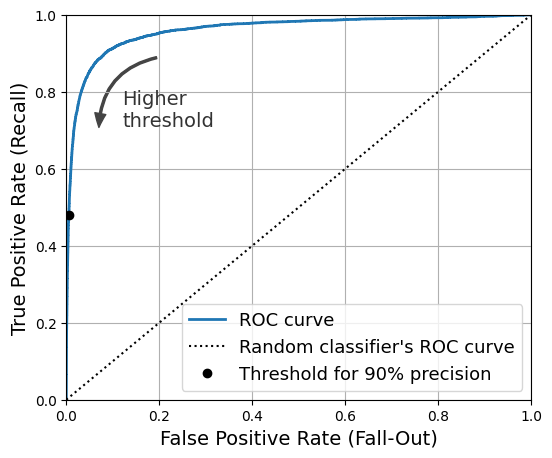

In [ ]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # 추가 코드
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# 추가 코드 – 그림 3–7을 그리고 저장합니다
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
#save_fig("roc_curve_plot")

plt.show()

* 검은 점이 90% 정밀도 부분 / 48% 재현율
* 재현율(TPR)이 높을수록 거짓양성비율(FPR)이 늘어남.. : 트레이드오프 관계
* 점선은 완전 랜덤 분류기의 곡선.. 점선에서 최대한 멀어져야 좋은 분류기다

> * 임계값이 낮을수록 모델은 더 많은 샘플을 양성으로 예측하므로, TPR과 FPR이 모두 증가.
> * 왼쪽 위 지점은 TPR이 1이고 FPR이 0인 지점 -> 모든 양성클래스를 정확히 분류하고, 모든 음성 샘플을 잘못 분류하지 않는다.
> * 점선 : TPR과 FPR이 동일하게 증가 -> 예측을 못하고 있음.

좋은 분류기는 TPR은 높으면서 FPR은 낮아야함.

AUC (Area under the curve, 곡선 아래 면적)
* 완벽한 분류기 : AUC 1
* 완벽한 랜덤 분류기 : AUC 0.5

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

`RandomForestClassifier`와 `SGDClassifier`의 비교

RandomForestClassifier : 여러개의 결정트리를 결합하여 분류 -> 7장

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

* `decision_function` 대신 각 샘플에 대한 클래스 확률을 반환하는 `precit_proba()`이용
> *여러개의 결정트리를 기반으로 동작하는데, 결정트리는 클래스의 확률을 기반으로 예측하기 때문에 결정점수가 없는 것 같다??

In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [ ]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [ ]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

> * 첫번쨰 이미지 -> 양성 확률 : 89%
> * 두번재 이미지 -> 양성확률 : 1%
> --> 참고 : 추정확률.. 필요하면 보정필요함
>  모델이 50%에서 60% 사이의 확률로 양성으로 분류한 이미지 중 실제로는 약 94%의 양성 이미지가 있음

In [ ]:
# 추정확률 보정
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


In [ ]:
idx_50_to_60

array([False, False, False, ..., False, False, False])

In [ ]:
y_train_5[idx_50_to_60]

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

* 두번째 열에 양수 클래스에 대한 추정 확률이 포함되어 있음

In [ ]:
y_probas_forest[:, 1]

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

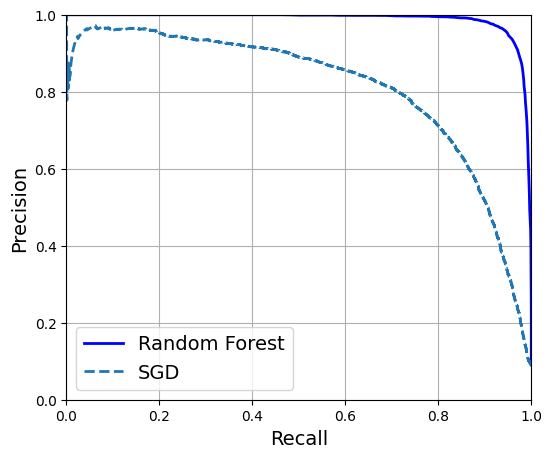

In [ ]:
plt.figure(figsize=(6, 5))  # 추가 코드

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# 추가 코드 – 그림 3–8을 그리고 저장합니다
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
#save_fig("pr_curve_comparison_plot")

plt.show()

Random Forest PR 곡선이 오른쪽 위에 가까움. SGD분류기보다 좋음을 알수 있음.

> 0.5를 임계값이라고 볼 수 있는건가?

In [ ]:
from sklearn.metrics import f1_score
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # 양성 확률 ≥ 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [ ]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

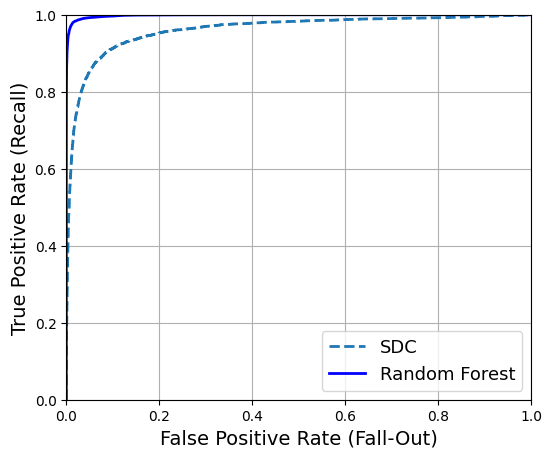

In [ ]:
plt.figure(figsize=(6, 5))

plt.plot(fpr, tpr, '--', linewidth=2, label="SDC")
plt.plot(fpr_forest, tpr_forest, 'b-', linewidth=2, label="Random Forest")

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

> ROC 곡선을 보더라도 Random Forest 곡선이 왼쪽 위에 가까워 더 좋은 분류기임을 알수 있다

## 4. 다중 분류


### 다중분류
* 둘 이상의 클래스를 구별
* 여러 클래스를 직접 처리할 수 있는 알고리즘 : LogisticRegression, RandomForestClassifier, GaussianNB 등
* 이진 분류만 가능한 SGDClassifier, SVC로 다중 클래스 분류 기법 존재

OvR(one-versus-the-rest) 또는 OvA(one-versus-all) 전략
* 특정 숫자 하나만 구분하는 이진 분류기 10개 준비 -> 각 분류기의 결정 점수에서 가장 높은 것을 클래스로 선택

OvO(one-versus-one) 전략
* 0과 1구별, 0과2 구별, 1과 2 구별 등 각 숫자의 조합마다 이진 분류기를 훈련

SVM은 대용량 데이터가 적절하지 않다.-> 시간복잡도가 다른모델에 비해 급격히 올라간다 (p.238)

SVM은 OvO 전략을 사용함 -> 클래스가 많아지면 학습해야할 이진 분류기 수가 늘어남

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train_5가 아니고 y_train을 사용합니다.

SVC(random_state=42)

In [ ]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

* 5를 예측함 -> 클래스 쌍마다 하나씩 45번의 예측을 수행

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit]) # some_digit = X[0]
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

* 9.3이 가장 높음 -> 5에 해당

In [ ]:
class_id = some_digit_scores.argmax()
class_id

5

In [ ]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
svm_clf.classes_[class_id]

`decision_function()`이 45개 점수를 반환하게 하려면 `decision_function_shape` 매개변수를 `"ovo"`로 지정합니다. 기본값은 `"ovr"`이지만 혼동하지 마세요. `SVC`는 항상 OvO로 훈련합니다. 이 매개변수는 45개 점수를 반환할지 여부에만 영향을 미칩니다:

In [ ]:
# 추가 코드 – 45개 OvO 점수를 얻는 방법
svm_clf.decision_function_shape = "ovo"
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

SVC 기반 OvR 전략 사용하는 다중 분류기

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
len(ovr_clf.estimators_) #분류기 갯수

10

SGDClassifier.....책 앞에는 이중 분류 알고리즘이라고 했는데 왜 그냥 되는거지?
사이킷런에서 OvR 전략을 사용했다는데?

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [ ]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

> 10개의 결과를 주는 것으로 보아 OvR 전략을 사용했음을 간접적으로 알수 있는 것 같다

* 각 클래스마다 거의 같은 개수의 이미지가 있어서(고르게 분포) 정확도를 이용해도 좋다

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

> 범위가 0에서 255이므로 255가 학습과정에서 더 큰 영향을 주기 때문에 스케일링을 함

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

정확도가 85.8% 이상에서 89.1% 이상으로 높아짐

## 5. 오류 분석

좋은 모델을 하나 찾았다고 가정하고 성능을 향상시켜보자

한가지 방법으로, 생성된 오류의 종류를 분석해보자

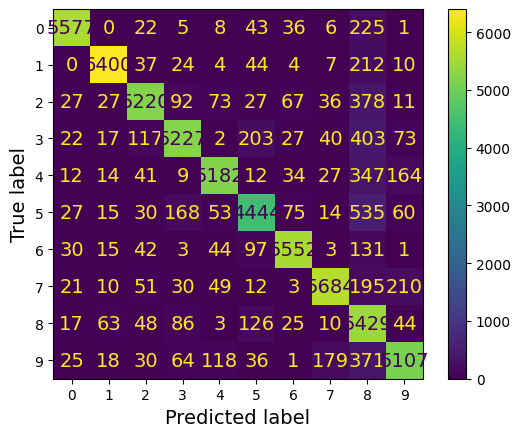

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

* 훈련된 분류 모델의 오차 행렬을 색상을 이용하여 표현
* 대각선 상에 위치한 색상이 밝은 것은 분류가 대체로 잘 이루어졋음을 의미
* 다만 5번 행이 상대적으로 어두운데 이는 숫자 5에 대해 더 많은 오류를 범했거나 데이터 집합에 다른 숫자보다 적기 때문

In [ ]:
'''
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)  # 추가 코드 - 폰트 크기를 줄입니다
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()
'''

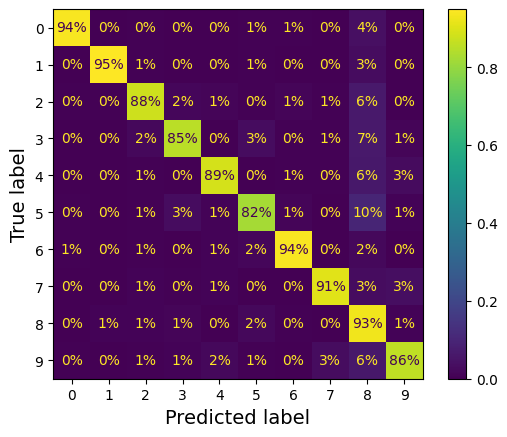

In [ ]:
plt.rc('font', size=10)  # 추가 코드
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

* 숫자별 비율로 변환 : 행별로 비율의 합이 100%가 되도록 정규화
* 각 행의 합으로 나누어서 정규화 (`normalize="true"`)
* 5를 8로 잘못 분류 10% / 8은 2%만 5로 잘못 분류 -> 오차행렬은 대칭이 아니다.

* 행으로 정규화

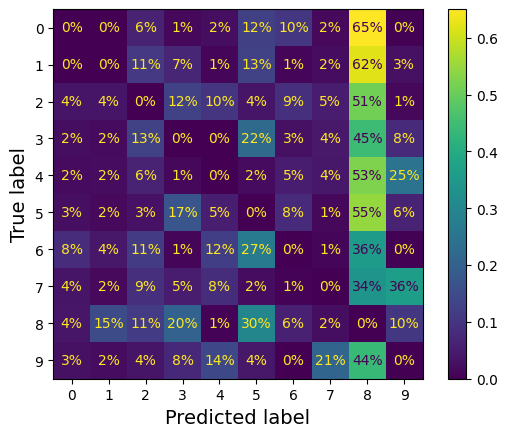

In [ ]:
sample_weight = (y_train_pred != y_train) #잘못된 예측만 True로 설정
plt.rc('font', size=10)  # 추가 코드
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

* 잘못된 예측만 가중치 주고, 잘된 예측은 가중치 0으로 제거 -> 어떤 오류를 범했는지 더 눈에 띔
* 8로 예측한 것이 눈에 띔..: 8로 잘못 분류함
* 7행 9열 : 36% -> 7 이미지에서 발생한 오류 중에 36%가 9로 잘못 분류됨

* 열로 정규화

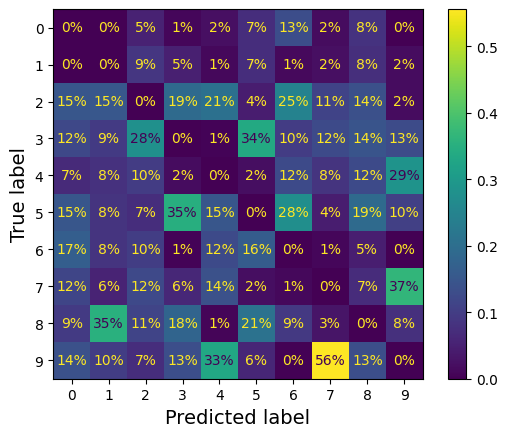

In [ ]:
sample_weight = (y_train_pred != y_train) #잘못된 예측만 True로 설정
plt.rc('font', size=10)  # 추가 코드
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
plt.show()

* 잘못 분류된 7의 56%는 실제 9이다

> ==> 8로 잘못 분류되는 것을 줄이도록 개선할 필요가 있음

> ==> 8처럼 보이는 다른 숫자의 훈련 데이터를 학습

> ==> 추가적인 특성 (예. 동심원의 수)

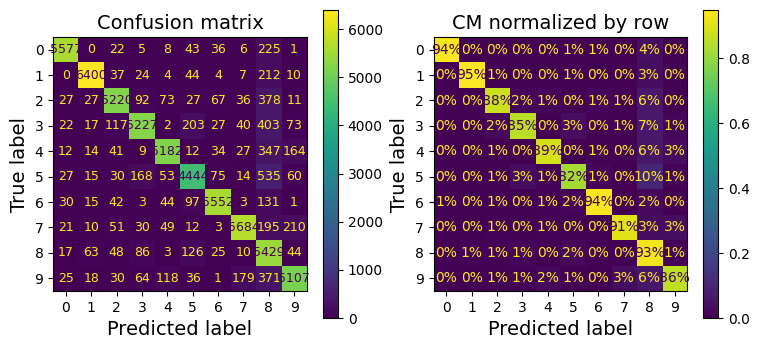

In [ ]:
# 추가 코드 – 그림 3–9을 생성하고 저장합니다
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
#save_fig("confusion_matrix_plot_1")
plt.show()

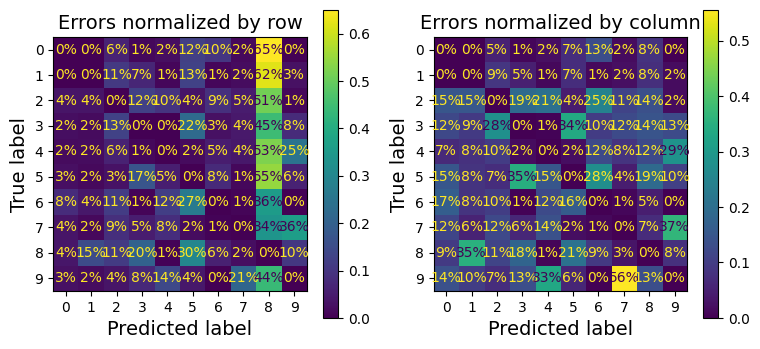

In [ ]:
# 추가 코드 – 그림 3–10을 생성하고 저장합니다
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
#save_fig("confusion_matrix_plot_2")
plt.show()
plt.rc('font', size=14)  # 폰트 크기를 다시 키웁니다

분류기가 잘못 분류한 것들을 비교해보자

In [ ]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] # 실제 3 / 예측 3
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)] # 실제 3 / 예측 5
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)] # 실제 5 / 예측 3
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)] # 실제 5 / 예측 5

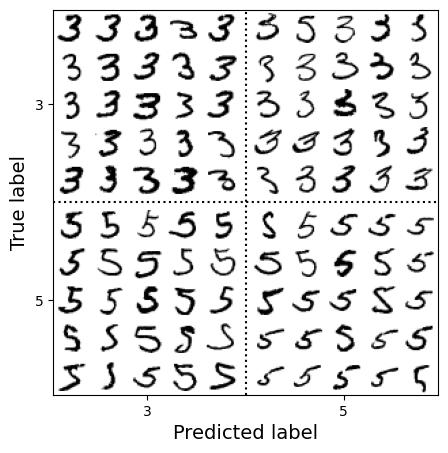

In [ ]:
# 추가 코드 – 그림 3–11을 생성하고 저장합니다
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
#save_fig("error_analysis_digits_plot")
plt.show()

* 사람은 분류가 쉬움
* 선형분류기는 클래스마다 픽셀에 가중치를 할당하고 새로운 이미지에 대해 픽셀 강도의 가중치 합을 클래스의 점수로 계산 -> 몇개의 픽셀만 다른 3과 5는 쉽게 혼동

-> 훈련 이미지를 약간 이동시키거나 회전된 변형 이미지로 훈련 집합을 보강 (데이터 증강) : 14장

## 6. 다중 레이블 분류

* 지금까지는 하나의 샘플에 하나의 클래스
* 하나의 샘플에 여러 클래스 : 다중 레이블
** 예. 분류기가 앨리스, 밥, 찰리 얼굴 인식 훈련, 만약 사진에 앨리스와 찰리가 있으면 [1,0,1] 을 출력해야함.

다중 레이블 분류 : 하나의 샘플에 여려개의 이진 꼬리표를 출력

KNeighborsClassifier : KNN(K-최근접 이웃) : 새로운 데이터 포인트의 클래스를 예측할 때, 그 데이터 포인트와 가장 가까운 K개의 이웃을 찾고, 이 이웃들의 클래스 중 가장 많이 나타나는 클래스를 예측 값으로 선택하는 방식

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

* 각 숫자 이미지에 두개의 레이블 (7보다 큰지, 홀수인지)

In [ ]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [ ]:
knn_clf.predict([some_digit])

array([[False,  True]])

* 5에 대해 올바르게 분류

평가

각 레이블의 F1 점수를 구하고 평균

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [ ]:
# 추가 코드 – average="weighted"로 지정했을 때 성능 향상은 무시할 수 있는 수준입니다.
#           이 클래스는 이미 꽤 균형 잡혀 있기 때문입니다.
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

SVC처럼 다중 레이블 분류를 지원하지 않는 분류기를 사용할 때

각 레이블당 하나의 모델을 학습 -> 그러나 종종 타깃은 서로 상관관계를 갖는다.

`ClassifierChain` : ClassifierChain은 먼저 첫 번째 레이블에 대해 이진 분류기를 학습시키고, 그 다음 두 번째 분류기를 학습시킬 때 첫 번째 레이블을 특성으로 포함시킨다. 그 다음엔 첫 번째와 두 번째 레이블을 특성으로 포함시켜 세 번째 분류기를 학습시킨다

In [ ]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [ ]:
chain_clf.predict([some_digit])

array([[0., 1.]])

## 7.다중 출력 분류

* 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화한 것

In [ ]:
np.random.seed(42)  # 동일하게 재현되게 하려고 지정합니다
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train  # 다중 레이블 (픽셀당 레이블 1), 그리고 각 레이블은 값을 여러개 (0~255)
y_test_mod = X_test

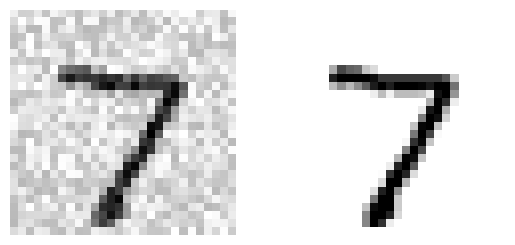

In [ ]:
# 추가 코드 – 그림 3–12을 생성하고 저장합니다
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
#save_fig("noisy_digit_example_plot")
plt.show()

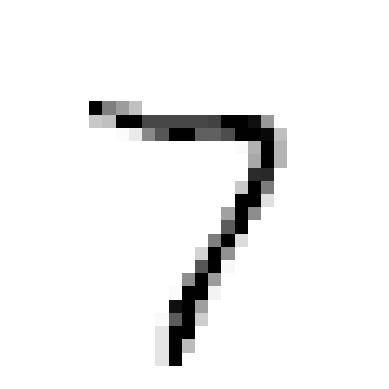

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
#save_fig("cleaned_digit_example_plot")  # 추가 코드 – 그림 3–13을 저장합니다
plt.show()

> 노이즈가 추가된 이미지를 KNN 모델을 사용해 복원